In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
############
# プロット #
###########

def ax_init(ax, xmin, xmax, ymin, ymax):
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel("x1", size = 14, weight = "light")
    ax.set_ylabel("x2", size = 14, weight = "light")


def plotScatterAndDistribution(ax, x, y, mu, sigma, color1, color2, xmin, xmax, ymin, ymax, flag=True):
    '''
    muの補助線
    点のプロット
    等高線に作図
    '''
    # 補助線
    if flag:
        ax.vlines(x=mu[0], ymin=ymin, ymax=ymax, linewidths=0.5, ls='--')
        ax.hlines(y=mu[1], xmin=xmin, xmax=xmax, linewidths=0.5, ls='--')

    # 散布図
    ax.scatter(x, y, s=5, color=color1)
    
    # 等高線
    n = 100
    xx = np.linspace(xmin, xmax, n)
    yy = np.linspace(ymin, ymax, n)
    X, Y = np.meshgrid(xx, yy)
    Z = stats.multivariate_normal(mu, sigma).pdf(np.dstack((X, Y)))
    ax.contour(X, Y, Z, colors=[color2], linewidths=0.5)

def plotRot(ax, x, y, theta, color):
    theta = theta / 180 * np.pi
    n = 50
    xx = np.zeros([len(x), n])
    yy = np.zeros([len(y), n])
    for j in range(n):
        theta_ = theta * j / (n - 1)
        A_ = np.array([[np.cos(theta_), - np.sin(theta_)],
                       [np.sin(theta_),   np.cos(theta_)]])
        x_, y_ = np.dot(A_, np.vstack([x, y]))
        xx[:, j] = x_
        yy[:, j] = y_
    for j in range(len(xx)):
        ax.plot(xx[j, :], yy[j, :], color=color, lw=0.5)
        

def plotStraight(ax, x, x_new, y, y_new, color):
    for i in range(len(x)):
        ax.plot([x[i], x_new[i]], [y[i], y_new[i]], color=color, lw=0.5)
    
        
def linearFunc(x, y , A, b):
    x_new, y_new = np.dot(A, np.array([x, y]))
    x_new = x_new + b[0]
    y_new = y_new + b[1]
    mu_new = np.dot(A, mu) + b
    sigma_new = np.dot(np.dot(A, sigma), A.transpose())
    return x_new, y_new, mu_new, sigma_new

def rotMat(theta):
    theta = theta / 180 * np.pi
    A = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    return A

def plotAxis(ax):
    ax.vlines(x=0, ymin=ymin, ymax=ymax, linewidths=0.5)
    ax.hlines(y=0, xmin=xmin, xmax=xmax, linewidths=0.5)


# 2次元正規分布 (X,Y)

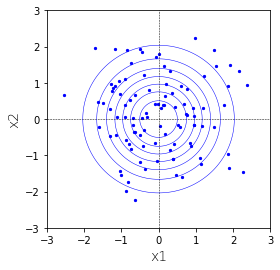

In [3]:
xmin = -3
xmax = 3
ymin = -3
ymax = 3
sampleSize = 100

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
ax_init(ax, xmin, xmax, ymin, ymax)

# 基本からサンプル生成
np.random.seed(0)
mu = np.array([0, 0])
sigma = np.array([[1, 0], [0, 1]])
x, y = stats.multivariate_normal(mu, sigma).rvs(size=sampleSize).T

plotScatterAndDistribution(ax, x, y, mu, sigma, 'blue', 'blue', xmin, xmax, ymin, ymax)

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


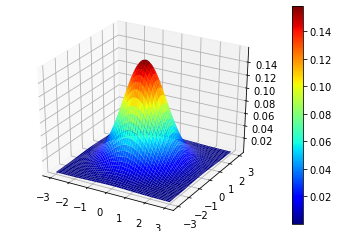

In [4]:
#https://qiita.com/kazetof/items/c0204f197d394458022a

N = 1000
x1 = np.linspace(-3, 3, N)
x2 = np.linspace(-3, 3, N)

X1, X2 = np.meshgrid(x1, x2)
X = np.c_[np.ravel(X1), np.ravel(X2)]

Y_plot = stats.multivariate_normal.pdf(x=X, mean=np.zeros(2), cov=np.eye(2))
Y_plot = Y_plot.reshape(X1.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, Y_plot, cmap='jet', linewidth=0)
fig.colorbar(surf)
#ax.set_title("Surface Plot")
fig.show()


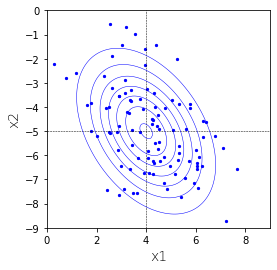

In [5]:
xmin = 0
xmax = 9
ymin = -9
ymax = 0
sampleSize = 100

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
ax_init(ax, xmin, xmax, ymin, ymax)

# 基本からサンプル生成
np.random.seed(0)
mu = np.array([4, -5])
sigma = np.array([[2, -1], [-1, 3]])
x, y = stats.multivariate_normal(mu, sigma).rvs(size=sampleSize).T

plotScatterAndDistribution(ax, x, y, mu, sigma, 'blue', 'blue', xmin, xmax, ymin, ymax)

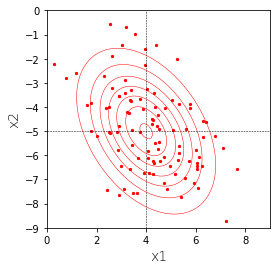

In [6]:
xmin = 0
xmax = 9
ymin = -9
ymax = 0
sampleSize = 100

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
ax_init(ax, xmin, xmax, ymin, ymax)

# 基本からサンプル生成
np.random.seed(0)
mu = np.array([4, -5])
sigma = np.array([[2, -1], [-1, 3]])
x, y = stats.multivariate_normal(mu, sigma).rvs(size=sampleSize).T

plotScatterAndDistribution(ax, x, y, mu, sigma, 'red', 'red', xmin, xmax, ymin, ymax)

# X+2,Y+3

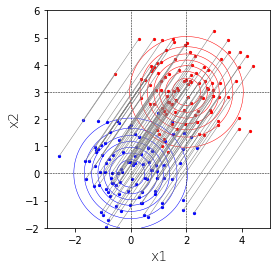

In [7]:
xmin = -3
xmax = 5
ymin = -2
ymax = 6
sampleSize = 100

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
ax_init(ax, xmin, xmax, ymin, ymax)

# 基本からサンプル生成
np.random.seed(0)
mu = np.array([0, 0])
sigma = np.array([[1, 0], [0, 1]])
x, y = stats.multivariate_normal(mu, sigma).rvs(size=sampleSize).T
plotScatterAndDistribution(ax, x, y, mu, sigma, 'blue', 'blue', xmin, xmax, ymin, ymax)

# 座標変換
A = np.array([[1, 0], [0, 1]])
b = np.array([2, 3])

x_new, y_new, mu_new, sigma_new  = linearFunc(x, y, A, b)

plotScatterAndDistribution(ax, x_new, y_new, mu_new, sigma_new, 'red', 'red', xmin, xmax, ymin, ymax)

plotStraight(ax, x, x_new, y, y_new, 'gray')

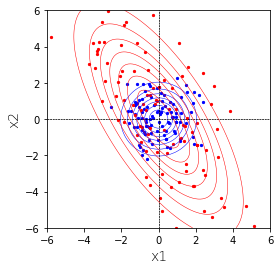

In [8]:
xmin = -6
xmax = 6
ymin = -6
ymax = 6
sampleSize = 100

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
ax_init(ax, xmin, xmax, ymin, ymax)

# 基本からサンプル生成
np.random.seed(0)
mu = np.array([0, 0])
sigma = np.array([[1, 0], [0, 1]])
x, y = stats.multivariate_normal(mu, sigma).rvs(size=sampleSize).T
plotScatterAndDistribution(ax, x, y, mu, sigma, 'blue', 'blue', xmin, xmax, ymin, ymax)

# 座標変換
A = np.array([[2, -1], [-1, 3]])
b = np.array([0, 0])

x_new, y_new, mu_new, sigma_new  = linearFunc(x, y, A, b)

plotScatterAndDistribution(ax, x_new, y_new, mu_new, sigma_new, 'red', 'red', xmin, xmax, ymin, ymax)

#plotStraight(ax, x, x_new, y, y_new, 'gray')

# X,2Y+5

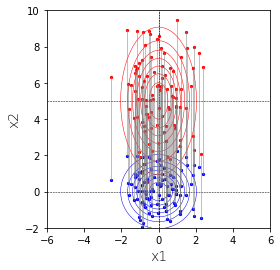

In [9]:
xmin = -6
xmax = 6
ymin = -2
ymax = 10
sampleSize = 100

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
ax_init(ax, xmin, xmax, ymin, ymax)

# 基本からサンプル生成
np.random.seed(0)
mu = np.array([0, 0])
sigma = np.array([[1, 0], [0, 1]])
x, y = stats.multivariate_normal(mu, sigma).rvs(size=sampleSize).T
plotScatterAndDistribution(ax, x, y, mu, sigma, 'blue', 'blue', xmin, xmax, ymin, ymax)

# 座標変換
A = np.array([[1, 0], [0, 2]])
b = np.array([0, 5])

x_new, y_new, mu_new, sigma_new  = linearFunc(x, y, A, b)

plotScatterAndDistribution(ax, x_new, y_new, mu_new, sigma_new, 'red', 'red', xmin, xmax, ymin, ymax)

plotStraight(ax, x, x_new, y, y_new, 'gray')

# 回転

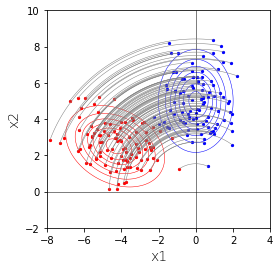

In [10]:
xmin = -8
xmax = 4
ymin = -2
ymax = 10
sampleSize = 100

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
ax_init(ax, xmin, xmax, ymin, ymax)

# 基本からサンプル生成
np.random.seed(0)
mu = np.array([0, 5])
sigma = np.array([[1, 0], [0, 2]])
x, y = stats.multivariate_normal(mu, sigma).rvs(size=sampleSize).T
plotScatterAndDistribution(ax, x, y, mu, sigma, 'blue', 'blue', xmin, xmax, ymin, ymax, flag=False)
    
A = rotMat(60)
b = np.array([0, 0])

plotRot(ax, x, y, 60, 'gray')

x_new, y_new, mu_new, sigma_new = linearFunc(x, y, A, b)

plotScatterAndDistribution(ax, x_new, y_new, mu_new, sigma_new, 'red', 'red', xmin, xmax, ymin, ymax, flag=False)

plotAxis(ax)

# 行列の積

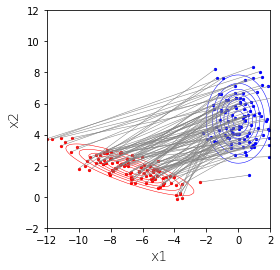

In [11]:
xmin = -12
xmax = 2
ymin = -2
ymax = 12
sampleSize = 100

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
ax_init(ax, xmin, xmax, ymin, ymax)

# 基本からサンプル生成
np.random.seed(0)
mu = np.array([0, 5])
sigma = np.array([[1, 0], [0, 2]])
x, y = stats.multivariate_normal(mu, sigma).rvs(size=sampleSize).T
plotScatterAndDistribution(ax, x, y, mu, sigma, 'blue', 'blue', xmin, xmax, ymin, ymax, flag=False)
    
# 座標変換
A = np.array([[-np.pi/4, - np.exp(1)/2],
              [np.sqrt(2)/2, np.sqrt(3)/5]])
b = np.array([0, 0])


x_new, y_new, mu_new, sigma_new = linearFunc(x, y, A, b)

plotScatterAndDistribution(ax, x_new, y_new, mu_new, sigma_new, 'red', 'red', xmin, xmax, ymin, ymax, flag=False)

# 写像
plotStraight(ax, x, x_new, y, y_new, 'gray')

In [12]:
A = np.array([[-np.pi/4, - np.exp(1)/2],
              [np.sqrt(2)/2, np.sqrt(3)/5]])
a, b, c = np.linalg.svd(A)
print(a)
# [[-0.913335    0.40720901]
#  [ 0.40720901  0.913335  ]]
print(b)
# [1.70927919 0.40308678]
print(c)
# [[ 0.58812621  0.80876917]
#  [ 0.80876917 -0.58812621]]

[[-0.913335    0.40720901]
 [ 0.40720901  0.913335  ]]
[1.70927919 0.40308678]
[[ 0.58812621  0.80876917]
 [ 0.80876917 -0.58812621]]


In [13]:

theta0 = 65.97037066062832
A0 = np.array([[np.cos(theta0 * np.pi / 180), - np.sin(theta0 * np.pi / 180)],
               [np.sin(theta0 * np.pi / 180),   np.cos(theta0 * np.pi / 180)]])

C1 = np.array([[1.70927919, 0], [0, 1]])
C2 = np.array([[1, 0], [0, 0.40308678]])

theta1 = -36.02415027165704
A1 = np.array([[np.cos(theta1 * np.pi / 180), - np.sin(theta1 * np.pi / 180)],
               [np.sin(theta1 * np.pi / 180),   np.cos(theta1 * np.pi / 180)]])

B = np.array([[0,1],[1,0]])

print(np.dot(np.dot(np.dot(np.dot(np.dot(A0, B), C2), C1), A1), B))
print(A)

[[-0.78539816 -1.35914092]
 [ 0.70710678  0.34641017]]
[[-0.78539816 -1.35914091]
 [ 0.70710678  0.34641016]]


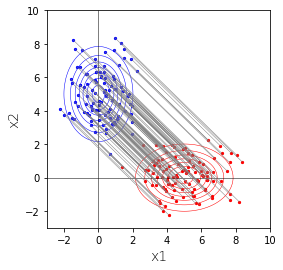

In [14]:
xmin = -3
xmax = 10
ymin = -3
ymax = 10
sampleSize = 100

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
ax_init(ax, xmin, xmax, ymin, ymax)

# 基本からサンプル生成
np.random.seed(0)
mu = np.array([0, 5])
sigma = np.array([[1, 0], [0, 2]])
x, y = stats.multivariate_normal(mu, sigma).rvs(size=sampleSize).T
plotScatterAndDistribution(ax, x, y, mu, sigma, 'blue', 'blue', xmin, xmax, ymin, ymax, flag=False)

x_new, y_new, mu_new, sigma_new = linearFunc(x, y, B, np.zeros(2))

plotScatterAndDistribution(ax, x_new, y_new, mu_new, sigma_new, 'red', 'red', xmin, xmax, ymin, ymax, flag=False)

# 写像
plotStraight(ax, x, x_new, y, y_new, 'gray')


plotAxis(ax)

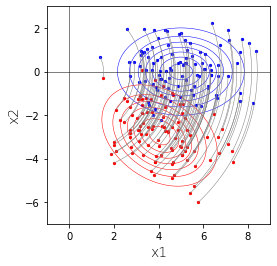

In [15]:
xmin = -1
xmax = 9
ymin = -7
ymax = 3
sampleSize = 100

mu = mu_new
sigma  = sigma_new


fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
ax_init(ax, xmin, xmax, ymin, ymax)

# 基本からサンプル生成
np.random.seed(0)
x, y = stats.multivariate_normal(mu, sigma).rvs(size=sampleSize).T
plotScatterAndDistribution(ax, x, y, mu, sigma, 'blue', 'blue', xmin, xmax, ymin, ymax, flag=False)
    
# 座標変換
x_new, y_new, mu_new, sigma_new = linearFunc(x, y, A1, np.zeros(2))
plotScatterAndDistribution(ax, x_new, y_new, mu_new, sigma_new, 'red', 'red', xmin, xmax, ymin, ymax, flag=False)

plotRot(ax, x, y, theta1, 'gray')

plotAxis(ax)

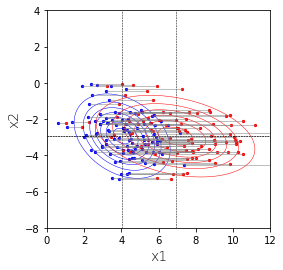

In [16]:
xmin = 0
xmax = 12
ymin = -8
ymax = 4

mu = mu_new
sigma  = sigma_new

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
ax_init(ax, xmin, xmax, ymin, ymax)

# 基本からサンプル生成
np.random.seed(0)
x, y = stats.multivariate_normal(mu, sigma).rvs(size=sampleSize).T
plotScatterAndDistribution(ax, x, y, mu, sigma, 'blue', 'blue', xmin, xmax, ymin, ymax)
    
# 座標変換
x_new, y_new, mu_new, sigma_new = linearFunc(x, y, C1, np.zeros(2))


plotScatterAndDistribution(ax, x_new, y_new, mu_new, sigma_new, 'red', 'red', xmin, xmax, ymin, ymax)

# 写像
plotStraight(ax, x, x_new, y, y_new, 'gray')


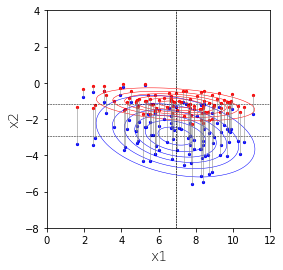

In [17]:
xmin = 0
xmax = 12
ymin = -8
ymax = 4

mu = mu_new
sigma  = sigma_new

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
ax_init(ax, xmin, xmax, ymin, ymax)

# 基本からサンプル生成
np.random.seed(0)
x, y = stats.multivariate_normal(mu, sigma).rvs(size=sampleSize).T
plotScatterAndDistribution(ax, x, y, mu, sigma, 'blue', 'blue', xmin, xmax, ymin, ymax)
    
# 座標変換
x_new, y_new, mu_new, sigma_new = linearFunc(x, y, C2, np.zeros(2))
plotScatterAndDistribution(ax, x_new, y_new, mu_new, sigma_new, 'red', 'red', xmin, xmax, ymin, ymax)

# 写像
plotStraight(ax, x, x_new, y, y_new, 'gray')


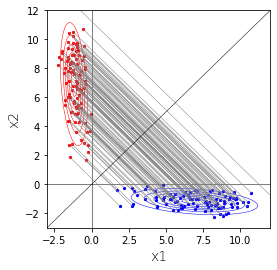

In [18]:
xmin = -3
xmax = 12
ymin = -3
ymax = 12


mu = mu_new
sigma  = sigma_new

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
ax_init(ax, xmin, xmax, ymin, ymax)

# 基本からサンプル生成
np.random.seed(0)
x, y = stats.multivariate_normal(mu, sigma).rvs(size=sampleSize).T
plotScatterAndDistribution(ax, x, y, mu, sigma, 'blue', 'blue', xmin, xmax, ymin, ymax, flag=False)
    
x_new, y_new, mu_new, sigma_new = linearFunc(x, y, B, np.zeros(2))


plotScatterAndDistribution(ax, x_new, y_new, mu_new, sigma_new, 'red', 'red', xmin, xmax, ymin, ymax, flag=False)


# 写像
plotStraight(ax, x, x_new, y, y_new, 'gray')

ax.plot([-100, 100], [-100, 100], lw=0.5, color='black')
plotAxis(ax)

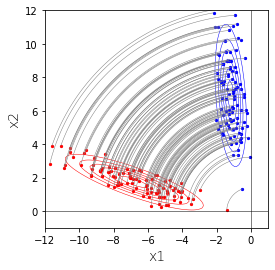

In [19]:
xmin = -12
xmax = 1
ymin = -1
ymax = 12

mu = mu_new
sigma  = sigma_new

sampleSize = 100

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
ax_init(ax, xmin, xmax, ymin, ymax)

# 基本からサンプル生成
np.random.seed(0)
x, y = stats.multivariate_normal(mu, sigma).rvs(size=sampleSize).T
plotScatterAndDistribution(ax, x, y, mu, sigma, 'blue', 'blue', xmin, xmax, ymin, ymax, flag=False)
    
# 座標変換

x_new, y_new, mu_new, sigma_new = linearFunc(x, y, A0, np.zeros(2))
plotScatterAndDistribution(ax, x_new, y_new, mu_new, sigma_new, 'red', 'red', xmin, xmax, ymin, ymax, flag=False)

# 写像
plotRot(ax, x, y, theta0, 'gray')
plotAxis(ax)

# その2

In [20]:
sigma = np.array([[2, -1], [-1, 3]])
u, v = np.linalg.eig(sigma)
print(v)
print(np.sqrt(u[0]))
print(np.sqrt(u[1]))
import numpy as np
lam = np.array([1.38196601, 3.61803399])
theta = -148.2825257681387
v = np.array([[np.cos(theta * np.pi / 180), -np.sin(theta * np.pi / 180)],
              [np.sin(theta * np.pi / 180), np.cos(theta * np.pi / 180)]])
print(v)
print(lam)
print(np.dot(np.dot(v, np.diag(lam)), v.transpose()))

[[-0.85065081  0.52573111]
 [-0.52573111 -0.85065081]]
1.1755705045849463
1.902113032590307
[[-0.85065081  0.52573111]
 [-0.52573111 -0.85065081]]
[1.38196601 3.61803399]
[[ 1.99999999 -1.        ]
 [-1.          3.00000001]]


In [21]:
sigma = np.array([[2, -1], [-1, 3]])
u, v = np.linalg.eig(sigma)
print(np.sqrt(u))
# [1.1755705  1.90211303]
print(v)
# [[-0.85065081  0.52573111]
#  [-0.52573111 -0.85065081]]

[1.1755705  1.90211303]
[[-0.85065081  0.52573111]
 [-0.52573111 -0.85065081]]


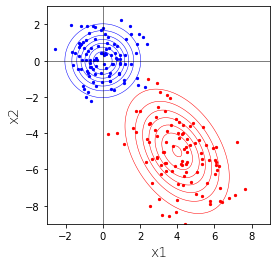

In [22]:
xmin = -3
xmax = 9
ymin = -9
ymax = 3
sampleSize = 100

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
ax_init(ax, xmin, xmax, ymin, ymax)

# 基本からサンプル生成
np.random.seed(0)
mu = np.array([0, 0])
sigma = np.array([[1, 0], [0, 1]])
x, y = stats.multivariate_normal(mu, sigma).rvs(size=sampleSize).T
plotScatterAndDistribution(ax, x, y, mu, sigma, 'blue', 'blue', xmin, xmax, ymin, ymax, flag=False)
    
# 座標変換
A1 = np.array([[1.1755705045849463, 0],
               [0, 1.902113032590307]])
theta = -148.2825257681387
A2 = np.array([[np.cos(theta * np.pi / 180), -np.sin(theta * np.pi / 180)],
              [np.sin(theta * np.pi / 180), np.cos(theta * np.pi / 180)]])

A = np.dot(A2, A1)
b = np.array([4, -5])


x_new, y_new, mu_new, sigma_new = linearFunc(x, y, A, b)

plotScatterAndDistribution(ax, x_new, y_new, mu_new, sigma_new, 'red', 'red', xmin, xmax, ymin, ymax, flag=False)

# 写像
#plotStraight(ax, x, x_new, y, y_new, 'gray')

plotAxis(ax)

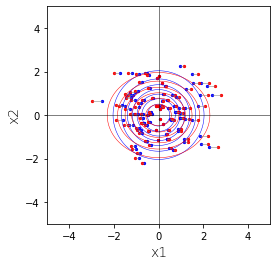

In [23]:
xmin = -5
xmax = 5
ymin = -5
ymax = 5
sampleSize = 100

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
ax_init(ax, xmin, xmax, ymin, ymax)

# 基本からサンプル生成
np.random.seed(0)
mu = np.array([0, 0])
sigma = np.array([[1, 0], [0, 1]])
x, y = stats.multivariate_normal(mu, sigma).rvs(size=sampleSize).T
plotScatterAndDistribution(ax, x, y, mu, sigma, 'blue', 'blue', xmin, xmax, ymin, ymax, flag=False)
    
# 座標変換
A = np.array([[1.1755705045849463, 0],
               [0, 1]])
b = np.array([0, 0])


x_new, y_new, mu_new, sigma_new = linearFunc(x, y, A, b)

plotScatterAndDistribution(ax, x_new, y_new, mu_new, sigma_new, 'red', 'red', xmin, xmax, ymin, ymax, flag=False)

# 写像
plotStraight(ax, x, x_new, y, y_new, 'gray')

plotAxis(ax)

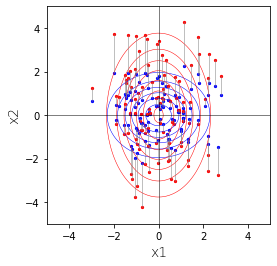

In [24]:
xmin = -5
xmax = 5
ymin = -5
ymax = 5
sampleSize = 100

mu = mu_new
sigma = sigma_new

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
ax_init(ax, xmin, xmax, ymin, ymax)

# 基本からサンプル生成
np.random.seed(0)
x, y = stats.multivariate_normal(mu, sigma).rvs(size=sampleSize).T
plotScatterAndDistribution(ax, x, y, mu, sigma, 'blue', 'blue', xmin, xmax, ymin, ymax, flag=False)
    
# 座標変換
A = np.array([[1, 0],
               [0, 1.902113032590307]])
b = np.array([0, 0])


x_new, y_new, mu_new, sigma_new = linearFunc(x, y, A, b)

plotScatterAndDistribution(ax, x_new, y_new, mu_new, sigma_new, 'red', 'red', xmin, xmax, ymin, ymax, flag=False)

# 写像
plotStraight(ax, x, x_new, y, y_new, 'gray')

plotAxis(ax)

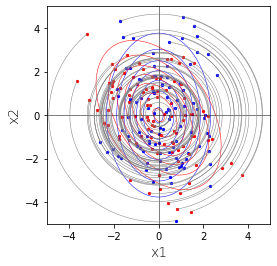

In [25]:
xmin = -5
xmax = 5
ymin = -5
ymax = 5
sampleSize = 100

mu = mu_new
sigma = sigma_new

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
ax_init(ax, xmin, xmax, ymin, ymax)

# 基本からサンプル生成
np.random.seed(0)
x, y = stats.multivariate_normal(mu, sigma).rvs(size=sampleSize).T
plotScatterAndDistribution(ax, x, y, mu, sigma, 'blue', 'blue', xmin, xmax, ymin, ymax, flag=False)
    
# 座標変換
theta = -148.2825257681387
A = np.array([[np.cos(theta * np.pi / 180), -np.sin(theta * np.pi / 180)],
              [np.sin(theta * np.pi / 180), np.cos(theta * np.pi / 180)]])
b = np.array([0, 0])


x_new, y_new, mu_new, sigma_new = linearFunc(x, y, A, b)

plotScatterAndDistribution(ax, x_new, y_new, mu_new, sigma_new, 'red', 'red', xmin, xmax, ymin, ymax, flag=False)

# 写像
plotRot(ax, x, y, theta, 'gray')
#plotStraight(ax, x, x_new, y, y_new, 'gray')

plotAxis(ax)

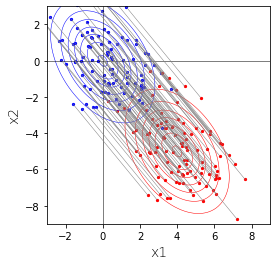

In [26]:
xmin = -3
xmax = 9
ymin = -9
ymax = 3
sampleSize = 100

mu = mu_new
sigma = sigma_new

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
ax_init(ax, xmin, xmax, ymin, ymax)

# 基本からサンプル生成
np.random.seed(0)
x, y = stats.multivariate_normal(mu, sigma).rvs(size=sampleSize).T
plotScatterAndDistribution(ax, x, y, mu, sigma, 'blue', 'blue', xmin, xmax, ymin, ymax, flag=False)
    
# 座標変換
A = np.eye(2)
b = np.array([4, -5])


x_new, y_new, mu_new, sigma_new = linearFunc(x, y, A, b)

plotScatterAndDistribution(ax, x_new, y_new, mu_new, sigma_new, 'red', 'red', xmin, xmax, ymin, ymax, flag=False)

# 写像
plotStraight(ax, x, x_new, y, y_new, 'gray')

plotAxis(ax)

# 長軸、短軸

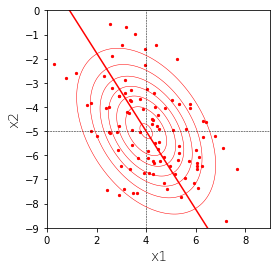

In [27]:
xmin = 0
xmax = 9
ymin = -9
ymax = 0
sampleSize = 100

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
ax_init(ax, xmin, xmax, ymin, ymax)

# 基本からサンプル生成
np.random.seed(0)
mu = np.array([4, -5])
sigma = np.array([[ 2     , -1],
                  [-1,  3     ]])
x, y = stats.multivariate_normal(mu, sigma).rvs(size=sampleSize).T
plotScatterAndDistribution(ax, x, y, mu, sigma, 'red', 'red', xmin, xmax, ymin, ymax)

theta = -148.2825257681387 + 90


x = np.array([-10, 10])
y =  np.sin(theta * np.pi / 180) / np.cos(theta * np.pi / 180) * (x-4) - 5

ax.plot(x, y, color='red')


# x軸への射影

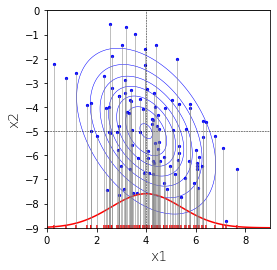

In [28]:
xmin = 0
xmax = 9
ymin = -9
ymax = 0
sampleSize = 100

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
ax_init(ax, xmin, xmax, ymin, ymax)

# 基本からサンプル生成
np.random.seed(0)
#mu = np.array([-4.33012702,  2.5       ])
#sigma = np.array([[ 1.75     , -0.4330127],
#                  [-0.4330127,  1.25     ]])
mu = np.array([4, - 5       ])
sigma = np.array([[ 2     , -1],
                  [-1,  3     ]])
x, y = stats.multivariate_normal(mu, sigma).rvs(size=sampleSize).T
plotScatterAndDistribution(ax, x, y, mu, sigma, 'blue', 'blue', xmin, xmax, ymin, ymax)


# 座標変換
A = np.array([[1, 0], [0, 0]])
b = np.array([0, 0])
x_new, y_new, mu_new, sigma_new = linearFunc(x, y, A, b)
y_new = y_new - 9

ax.scatter(x_new, y_new, marker='|', color='red')


# 確率密度関数のプロット
xx = np.linspace(xmin, xmax, 100)
ax.plot(xx, 5*stats.norm.pdf(xx, loc=mu_new[0], scale=sigma_new[0,0]**0.5)-9, color='red')
ax.hlines([0], xmin, xmax, lw=0.5)

# 写像
plotStraight(ax, x, x_new, y, y_new, 'gray')


# z軸への射影

-0.5773502691896258


0.5773502691896258

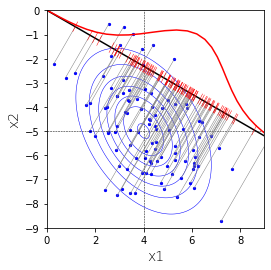

In [29]:
xmin = 0
xmax = 9
ymin = -9
ymax = 0
sampleSize = 100

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1, aspect="equal")
ax_init(ax, xmin, xmax, ymin, ymax)

# 基本からサンプル生成
np.random.seed(0)
mu = np.array([4, - 5       ])
sigma = np.array([[ 2     , -1],
                  [-1,  3     ]])
x, y = stats.multivariate_normal(mu, sigma).rvs(size=sampleSize).T
plotScatterAndDistribution(ax, x, y, mu, sigma, 'blue', 'blue', xmin, xmax, ymin, ymax)

A = np.array([[3/4, -np.sqrt(3)/4],
              [-np.sqrt(3)/4, 1/4]])
b = np.zeros(2)

x_new, y_new, _, _ = linearFunc(x, y, A, b)



plotStraight(ax, x, x_new, y, y_new, 'gray')

a = 0.75 ** 0.5
b = -0.25 ** 0.5

ax.plot([-100,100], [-100*b/a,100*b/a], color='black')


# 写像先のサンプル
plotStraight(ax, x_new - 0.1, x_new + 0.1, y_new - 0.2, y_new + 0.2, 'red')

    
mu_new = a * mu[0] + b * mu[1]
sigma_new = a ** 2 * sigma[0, 0] + b ** 2 * sigma[1, 1] + 2 * a * b * sigma[0, 1]

n = 100
xx = np.linspace(-20, 20, n)
yy =  10 * stats.norm.pdf(xx, mu_new, np.sqrt(sigma_new))

def rot_vec(x, theta):
    rot_mat = np.array([[np.cos(theta), -np.sin(theta)],
                        [np.sin(theta),  np.cos(theta)]])
    return  np.dot(rot_mat, x)

zz = [rot_vec(np.array([x, y]), np.arctan2(b, a)) for x, y in zip(xx, yy)]
xx = [i[0] for i in zz]
yy = [i[1] for i in zz]
ax.plot(xx, yy, color = 'red')

ax.plot([-100, 100], [100*a/b+4.93, -100*a/b+4.93], lw=0.5, color='black', linestyle='--')

print(b/a)

1/ np.sqrt(3)

# 条件付き

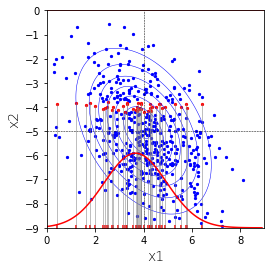

In [30]:
y_0 = -4
xmin = 0
xmax = 9
ymin = -9
ymax = 0

np.random.seed(0)
mu = np.array([4, - 5       ])
sigma = np.array([[ 2     , -1],
                  [-1,  3     ]])
x, y = stats.multivariate_normal(mu, sigma).rvs(size=500).T
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1, aspect="equal")
ax_init(ax, xmin, xmax, ymin, ymax)



hit = np.logical_and(y_0 - 0.2 < y , y < y_0 + 0.2)
plotScatterAndDistribution(ax, x[~hit], y[~hit], mu, sigma, 'blue', 'blue', xmin, xmax, ymin, ymax)

ax.scatter(x[hit], y[hit], s=5, color='red')
ax.scatter(x[hit], np.zeros(x[hit].shape)-9, marker='|', color='red')

plotStraight(ax, x[hit], x[hit], y[hit], np.zeros_like(y[hit])-9, 'gray')

    
ax.plot([-100,100], [0,0], color='red')
ax.plot(np.arange(xmin, xmax, 0.1), -9 + 10 * stats.norm.pdf(np.arange(xmin, xmax, 0.1),
                                                        mu[0] + sigma[0,1]/sigma[1,1]*(y_0-mu[1]),
                                                        np.sqrt(sigma[0,0]-sigma[0,1]**2/sigma[1,1])),color='red')


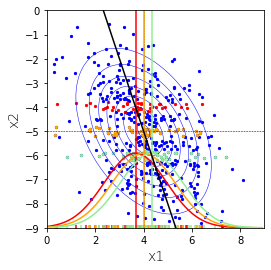

In [31]:
y_0 = -4
y_1 = -5
y_2 = -6
xmin = 0
xmax = 9
ymin = -9
ymax = 0

np.random.seed(0)
mu = np.array([4, - 5       ])
sigma = np.array([[ 2     , -1],
                  [-1,  3     ]])
x, y = stats.multivariate_normal(mu, sigma).rvs(size=500).T
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1, aspect="equal")
ax_init(ax, xmin, xmax, ymin, ymax)


hit = np.logical_and(y_0 - 0.2 < y , y < y_0 + 0.2)
plotScatterAndDistribution(ax, x[~hit], y[~hit], mu, sigma, 'blue', 'blue', xmin, xmax, ymin, ymax)
ax.scatter(x[hit], y[hit], s=5, color='red')
ax.scatter(x[hit], np.zeros(x[hit].shape)-9, marker='|', color='red')
ax.plot(np.arange(xmin, xmax, 0.1), -9 + 10 * stats.norm.pdf(np.arange(xmin, xmax, 0.1),
                                                        mu[0] + sigma[0,1]/sigma[1,1]*(y_0-mu[1]),
                                                        np.sqrt(sigma[0,0]-sigma[0,1]**2/sigma[1,1])),color='red')
ax.vlines(x=mu[0] + sigma[0,1]/sigma[1,1]*(y_0-mu[1]), ymin=ymin, ymax=ymax, color='red')



hit = np.logical_and(y_1 - 0.2 < y , y < y_1 + 0.2)
ax.scatter(x[hit], y[hit], s=5, color='orange')
ax.scatter(x[hit], np.zeros(x[hit].shape) - 9, marker='|', color='orange')
ax.plot(np.arange(xmin, xmax, 0.1), -9 +10 * stats.norm.pdf(np.arange(xmin, xmax, 0.1),
                                                        mu[0] + sigma[0,1]/sigma[1,1]*(y_1-mu[1]),
                                                        np.sqrt(sigma[0,0]-sigma[0,1]**2/sigma[1,1])),color='orange')
ax.vlines(x=mu[0] + sigma[0,1]/sigma[1,1]*(y_1-mu[1]), ymin=ymin, ymax=ymax, color='orange')



hit = np.logical_and(y_2 - 0.2 < y , y < y_2 + 0.2)
ax.scatter(x[hit], y[hit], s=5, color='lightgreen')
ax.scatter(x[hit], np.zeros(x[hit].shape) -9, marker='|', color='lightgreen')
ax.plot(np.arange(xmin, xmax, 0.1), -9 + 10 * stats.norm.pdf(np.arange(xmin, xmax, 0.1),
                                                        mu[0] + sigma[0,1]/sigma[1,1]*(y_2-mu[1]),
                                                        np.sqrt(sigma[0,0]-sigma[0,1]**2/sigma[1,1])),color='lightgreen')
ax.vlines(x=mu[0] + sigma[0,1]/sigma[1,1]*(y_2-mu[1]), ymin=ymin, ymax=ymax, color='lightgreen')


y = np.linspace(-20, 20, 100)
x = mu[0] + sigma[0,1]/sigma[1,1]*(y-mu[1])

ax.plot(x, y, color='black')


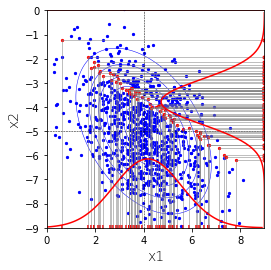

In [32]:
np.random.seed(0)
xmin = 0
xmax = 9
ymin = -9
ymax = 0
k = -1

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1, aspect="equal")
ax_init(ax, xmin, xmax, ymin, ymax)

x, y = stats.multivariate_normal(mu, sigma).rvs(size=1000).T


hit = []
for x_, y_ in zip(x, y):
    if -2/3 * x_ - 0.2 + k < y_ and y_ < -2/3 * x_ + 0.2 + k:
        hit.append(True)
    else:
        hit.append(False)
hit = np.array(hit)
plotScatterAndDistribution(ax, x[~hit], y[~hit], mu, sigma, 'blue', 'blue', xmin, xmax, ymin, ymax)

ax.scatter(x[hit], y[hit], s=5, color='red')

ax.scatter(x[hit], np.zeros(x[hit].shape)-9, marker='|', color='red')
ax.scatter(np.zeros(x[hit].shape)+9, y[hit], marker='.', color='red')
    
plotStraight(ax, x[hit], x[hit], y[hit], np.zeros_like(y[hit])-9, 'gray')

plotStraight(ax, x[hit], np.zeros_like(x[hit])+9, y[hit], y[hit], 'gray')


    
ax.plot([-100,100], [0,0], color='red')


#####
def f(x):
    y = -2/3*x+k
    return -1/2*np.dot(np.dot(np.array([x-mu[0],y-mu[1]]), np.linalg.inv(sigma)), np.array([x-mu[0],y-mu[1]]))
c = f(0)
b = (f(1) - f(-1)) / 2
a = f(1) - b - c


ax.plot(np.arange(xmin, xmax, 0.1), -9 + 10 * stats.norm.pdf(np.arange(xmin, xmax, 0.1),
                                                        - b / 2 / a,
                                                        np.sqrt(-1 / a/ 2)),color='red')


def f2(y):
    x = - (y - k) * 3/2
    return -1/2*np.dot(np.dot(np.array([x-mu[0],y-mu[1]]), np.linalg.inv(sigma)), np.array([x-mu[0],y-mu[1]]))
c = f2(0)
b = (f2(1) - f2(-1)) / 2
a = f2(1) - b - c

ax.plot(9 - 10 * stats.norm.pdf(np.arange(ymin, ymax, 0.1), - b / 2 / a, np.sqrt(-1 / a/ 2)), np.arange(ymin, ymax, 0.1),
                                                        color='red')




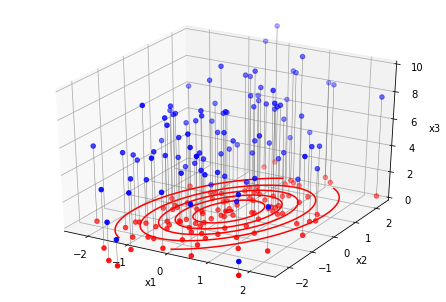

In [33]:
from mpl_toolkits.mplot3d import Axes3D

size = 500
 
# 平均
mu = [0, 0, 6]
 
# 共分散
sigma = [[1, 0.5, -0.5],
         [0.5, 2, 1],
         [-0.5, 1, 3]]
 
# 乱数を生成
data = np.random.multivariate_normal(mu, sigma, size=100)
# 描画
#
fig = plt.figure()
ax = Axes3D(fig)
 
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")


k = 5
xmin = -k/2
ymin = -k/2
zmin = 0

xmax = k/2
ymax = k/2
zmax = 2 * k

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_zlim(zmin, zmax)
#ax.set_aspect('equal')

ax.scatter(data[:,0], data[:,1], data[:,2], color='blue')

A = np.array([[1,0,0],[0,1,0],[0,0,0]])
data2 = np.dot(data, A)
ax.scatter(data2[:,0], data2[:,1], data2[:,2], color='red')

for i in range(len(data2)):
    ax.plot([data[i, 0], data2[i, 0]], [data[i, 1], data2[i, 1]], [data[i, 2], data2[i, 2]], color='gray', lw=0.5)


x = [-k, k]
y = [-k, k]
z = np.linspace(0, 100, 11)
Y, Z = np.meshgrid(y, z)
X = np.array([x] * Y.shape[0])

#fig = plt.figure()
#ax = Axes3D(fig)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")
x = [-k, k]
y = [-k, k]
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
#ax.plot_surface(X, Y, Z, alpha=0.3, color='red') 


n = 100
xx = np.linspace(xmin, xmax, n)
yy = np.linspace(ymin, ymax, n)
X, Y = np.meshgrid(xx, yy)

mu = [0, 0]
 
# 共分散
sigma = [[1, 0.5],
         [0.5, 2]]


Z = stats.multivariate_normal(mu, sigma).pdf(np.dstack((X, Y)))
ax.contour(X, Y, Z, colors='red')
